In [1]:
from scipy.stats import vonmises,skewnorm
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from tqdm import tqdm
import numpy as np
import ot

from lcot import LCOT
from lcot.measures import measure,empirical_measure,ot_1d
from lcot.visualize import plot_circle_pdf

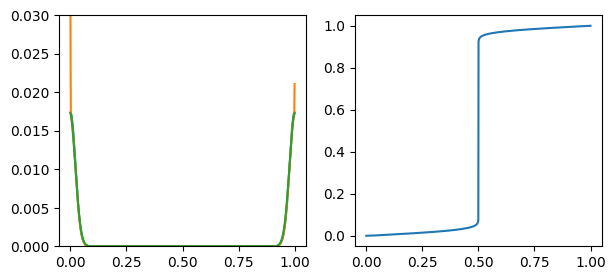

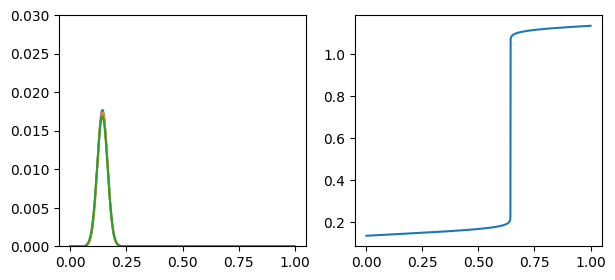

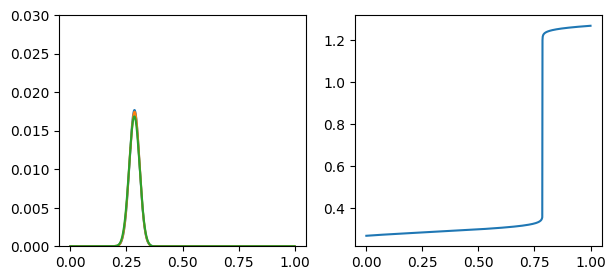

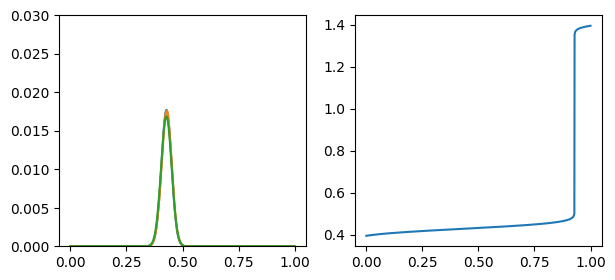

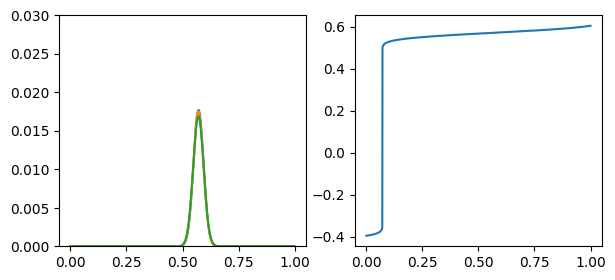

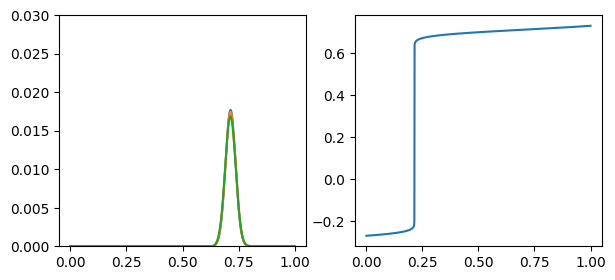

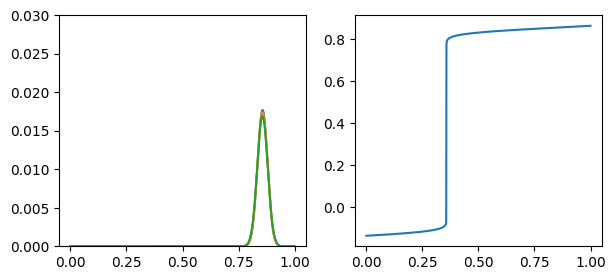

In [3]:
x = np.linspace(-np.pi, np.pi, 1000)
t = np.linspace(0, 1, 1000)
kappa = 50
lcot = LCOT(t)
for loc in np.linspace(-np.pi,np.pi,8)[:-1]:
    pdf = vonmises.pdf(loc, kappa, x)      
    pdf /= pdf.sum()
    nu = measure([t,pdf])
    nuEmbedd = lcot.forward(nu)

    nuhat1 = lcot.inverse(nuEmbedd)
    nuhat2 = lcot.inverse_kde(nuEmbedd,kappa=500)
    nuhat1.density_y/=nuhat1.density_y.sum()
    nuhat2.density_y/=nuhat2.density_y.sum()
    fig,ax = plt.subplots(1,2,figsize=(7,3))    
    ax[0].plot(t,pdf)
    ax[0].plot(t,nuhat1.density_y)
    ax[0].plot(t,nuhat2.density_y)
    ax[0].set_ylim([0,.03])
    ax[1].plot(t,(nuEmbedd+t))
    plt.show()

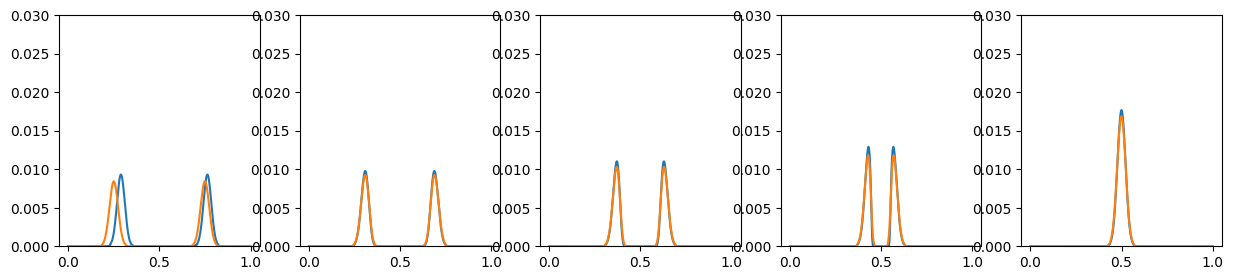

In [7]:
x = np.linspace(-np.pi, np.pi, 1000)
t = np.linspace(0, 1, 1000)
kappa = 50
lcot = LCOT(t)
pdf = vonmises.pdf(0, kappa, x)      
pdf /= pdf.sum()
nu = measure([t,pdf])
nuEmbedd = lcot.forward(nu)

pdf = .5*(vonmises.pdf(-np.pi/2, kappa, x)+vonmises.pdf(np.pi/2, kappa, x))    
pdf /= pdf.sum()
mu = measure([t,pdf])
muEmbedd = lcot.forward(mu)

fig,ax = plt.subplots(1,5,figsize=(15,3))
for i,a in enumerate(np.linspace(0,1,5)):
    embedd = a*nuEmbedd+(1-a)*muEmbedd
    mnu1 = lcot.inverse(embedd)
    mnu2 = lcot.inverse_kde(embedd,kappa=500)
    mnu1.density_y/=mnu1.density_y.sum()
    mnu2.density_y/=mnu2.density_y.sum()
    ax[i].plot(t,mnu1.density_y)
    ax[i].plot(t,mnu2.density_y)
    ax[i].set_ylim([0,.03])
plt.show()